In [3]:
path = 'od/data/images/aruno1.jpg'

In [6]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import os




aruno3.jpg


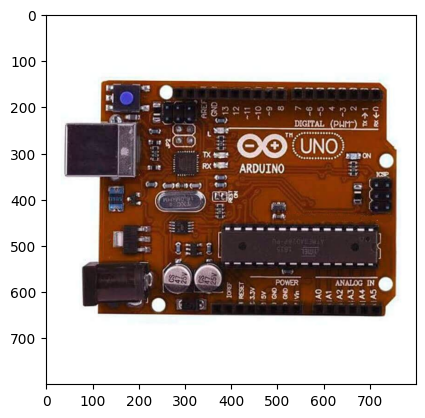

In [17]:
import cv2

def augment_image(input_image, output_dir, filename, alpha=1.0, beta=0):
    """
    Adjusts the contrast and brightness of an image and saves it to a file.

    Args:
        input_image (str): Path to the input image file.
        output_dir (str): Directory where augmented images will be saved.
        filename (str): Base filename for the saved images.
        alpha (float): Controls the contrast (default: 1.0).
        beta (float): Controls the brightness (default: 0).
    """
    image = cv2.imread(input_image)
    augmented_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    # Save the augmented image
    output_path = f"{output_dir}/{filename}_ct{alpha}_br{beta}.jpg"
    cv2.imwrite(output_path, augmented_image)
    return augmented_image
# Load an example image
input_image_path = 'data/images/aruno3.jpg'

# Set the output directory
output_directory = 'augmented_data'


filename = os.path.basename(input_image_path)

print(filename)
# Apply image augmentation with different parameters
im1 = augment_image(input_image_path, output_directory, filename, alpha=1, beta=30)
im2 = augment_image(input_image_path, output_directory, filename, alpha=1, beta=-30)
im3 = augment_image(input_image_path, output_directory, filename, alpha=1.5, beta=0)
im4 = augment_image(input_image_path, output_directory, filename, alpha=1.5, beta=30)
im5 = augment_image(input_image_path, output_directory, filename, alpha=1.5, beta=-30)
im6 = augment_image(input_image_path, output_directory, filename, alpha=0.5, beta=-30)
im7 = augment_image(input_image_path, output_directory, filename, alpha=0.5, beta=0)
im8 = augment_image(input_image_path, output_directory, filename, alpha=0.5, beta=30)

# Display the original and augmented images (for visualization purposes)
input_image = cv2.imread(input_image_path)
plt.imshow(input_image)



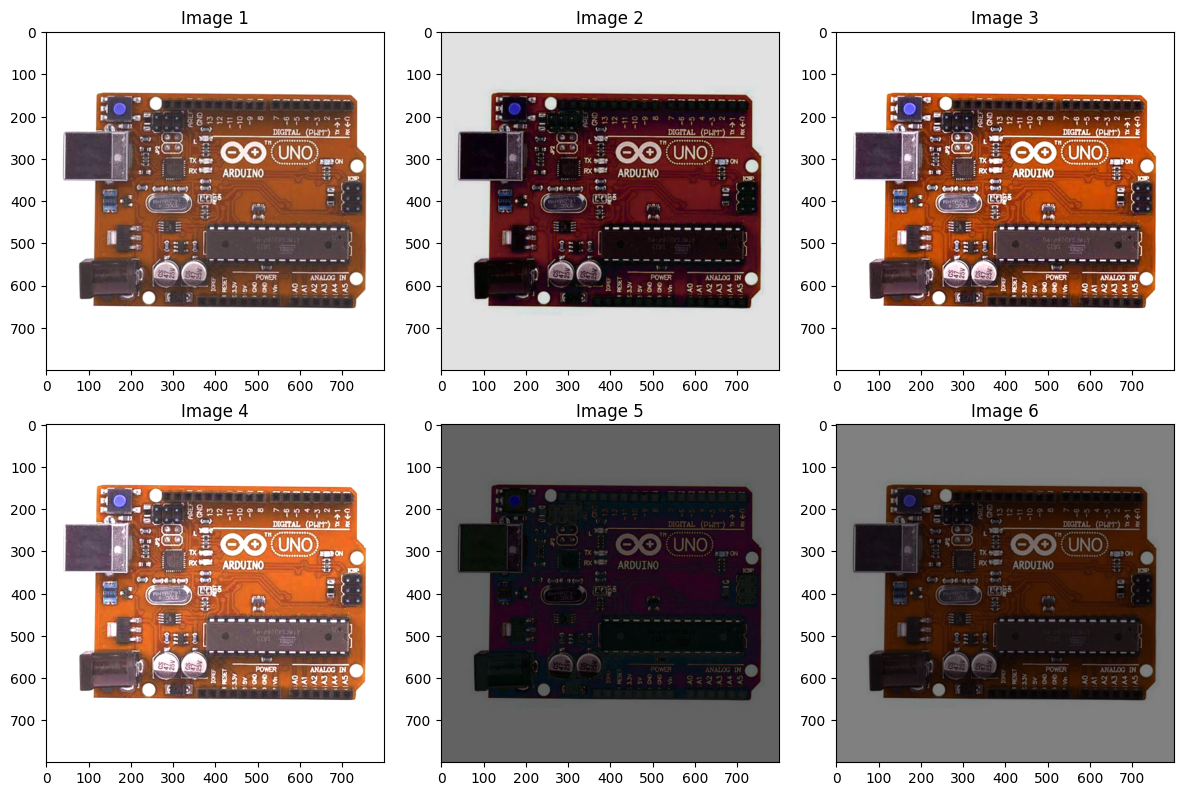

In [15]:

# Create a 2x3 grid for the images
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.subplot(2, 3, 1)
plt.imshow(im1)
plt.title('Image 1')

plt.subplot(2, 3, 2)
plt.imshow(im2)
plt.title('Image 2')

plt.subplot(2, 3, 3)
plt.imshow(im3)
plt.title('Image 3')

plt.subplot(2, 3, 4)
plt.imshow(im4)
plt.title('Image 4')

plt.subplot(2, 3, 5)
plt.imshow(im5)
plt.title('Image 5')

plt.subplot(2, 3, 6)
plt.imshow(im6)
plt.title('Image 6')

# Use tight_layout to automatically adjust subplot parameters
plt.tight_layout()

# Show the images
plt.show()


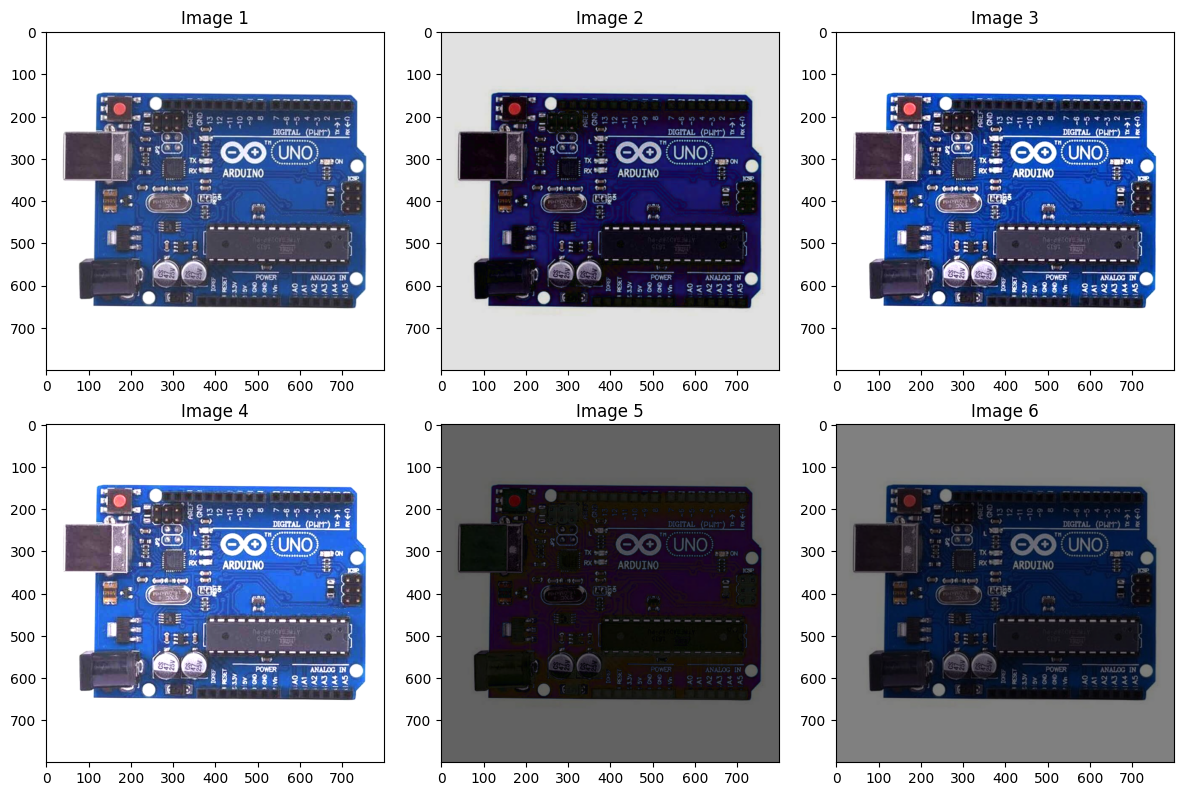

In [16]:

rgb_image1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
rgb_image2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
rgb_image3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
rgb_image4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
rgb_image5 = cv2.cvtColor(im5, cv2.COLOR_BGR2RGB)
rgb_image6 = cv2.cvtColor(im6, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8)) 
plt.subplot(2, 3, 1)
plt.imshow(rgb_image1)
plt.title('Image 1')

plt.subplot(2, 3, 2)
plt.imshow(rgb_image2)
plt.title('Image 2')

plt.subplot(2, 3, 3)
plt.imshow(rgb_image3)
plt.title('Image 3')

plt.subplot(2, 3, 4)
plt.imshow(rgb_image4)
plt.title('Image 4')

plt.subplot(2, 3, 5)
plt.imshow(rgb_image5)
plt.title('Image 5')

plt.subplot(2, 3, 6)
plt.imshow(rgb_image6)
plt.title('Image 6')

plt.tight_layout()

plt.show()


In [23]:
import cv2
import numpy as np
import os

def augment_and_save_images(image_path, label_path, save_dir, num_augmentations=3):
    """
    Augment an image and its label multiple times and save them to specified files.

    Args:
        image_path (str): Path to the original image file.
        label_path (str): Path to the label file corresponding to the original image.
        save_dir (str): Directory where augmented images and labels will be saved.
        num_augmentations (int): Number of augmented versions to generate.

    Returns:
        List of tuples: Each tuple contains the path to the augmented image and label.
    """
    augmented_images = []
    for i in range(num_augmentations):
        # Load the original image
        original_image = cv2.imread(image_path)
        
        # Load the original label as a 2-dimensional array
        original_label = np.loadtxt(label_path, delimiter=' ')  # Specify the delimiter

         # 1. Horizontal Flipping
        if np.random.rand() > 0.5:
            original_image = cv2.flip(original_image, 1)  # 1 for horizontal flip
            original_label[:, 1] = 1.0 - original_label[:, 1]  # Update x-center coordinates

        # 2. Scaling and Translation
        scale_factor = np.random.uniform(0.8, 1.2)
        translation_x = np.random.uniform(-20, 20)
        translation_y = np.random.uniform(-20, 20)
        M = np.array([[scale_factor, 0, translation_x],
                      [0, scale_factor, translation_y]], dtype=np.float32)
        original_image = cv2.warpAffine(original_image, M, (original_image.shape[1], original_image.shape[0]))
        original_label[:, 1:3] = original_label[:, 1:3] * scale_factor + [translation_x, translation_y]

        # 3. Rotation and Shearing
        rotation_angle = np.random.uniform(-15, 15)
        shear_angle = np.random.uniform(-10, 10)
        M = cv2.getRotationMatrix2D((original_image.shape[1] / 2, original_image.shape[0] / 2), rotation_angle, 1)
        original_image = cv2.warpAffine(original_image, M, (original_image.shape[1], original_image.shape[0]))
        shear_matrix = np.array([[1, np.tan(np.radians(shear_angle)), 0],
                                 [0, 1, 0]], dtype=np.float32)
        original_image = cv2.warpAffine(original_image, shear_matrix, (original_image.shape[1], original_image.shape[0]))
        original_label[:, 1:3] = np.dot(original_label[:, 1:3], M[:, :2]) + shear_matrix[:, 2]


        # Update labels to reflect augmentations
        original_label[:, 1:3] = original_label[:, 1:3] * scale_factor + [translation_x, translation_y]
        original_label[:, 3:5] *= scale_factor
        original_label[:, 1:3] = np.dot(original_label[:, 1:3], M[:, :2]) + shear_matrix[:, 2]

        # Generate filenames using the same index
        filename_index = i

        # Save the augmented image and label
        augmented_image_path = os.path.join(save_dir, f"augmented_{filename_index}.jpg")
        augmented_label_path = os.path.join(save_dir, f"augmented_{filename_index}.txt")
        cv2.imwrite(augmented_image_path, original_image)

        # Save the augmented label in the format you specified
        np.savetxt(augmented_label_path, original_label, fmt='%.6f')

        augmented_images.append((augmented_image_path, augmented_label_path))

    return augmented_images

# Example usage:
image_path = "data/images/aruno3.jpg"
label_path = "data/labels/aruno3.txt"
save_dir = "augmented_data/test"
num_augmentations = 3

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

augmented_images = augment_and_save_images(image_path, label_path, save_dir, num_augmentations)

for i, (augmented_image_path, augmented_label_path) in enumerate(augmented_images):
    print(f"Augmented image {i + 1}: {augmented_image_path}")
    print(f"Augmented label {i + 1}: {augmented_label_path}")


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [7]:
import cv2
import numpy as np
import os

def augment_and_save_images(image_path, label_path, save_dir, num_augmentations=3):
    """
    Augment an image and its label multiple times and save them to specified files.

    Args:
        image_path (str): Path to the original image file.
        label_path (str): Path to the label file corresponding to the original image.
        save_dir (str): Directory where augmented images and labels will be saved.
        num_augmentations (int): Number of augmented versions to generate.

    Returns:
        List of tuples: Each tuple contains the path to the augmented image and label.
    """
    augmented_images = []
    
    # Load the original image
    original_image = cv2.imread(image_path)
    
    # Load the original label as a list of lists
    with open(label_path, 'r') as label_file:
        original_labels = [line.strip().split() for line in label_file]
    
    for i in range(num_augmentations):
        # Create copies of the original image and labels
        augmented_image = original_image.copy()
        augmented_labels = [list(map(float, label)) for label in original_labels]
        
        # Apply augmentations
        # 1. Horizontal Flipping
        if np.random.rand() > 0.5:
            augmented_image = cv2.flip(augmented_image, 1)  # 1 for horizontal flip
            augmented_labels[:, 1] = 1.0 - augmented_labels[:, 1]  # Update x-center coordinates

        # 2. Scaling and Translation
        scale_factor = np.random.uniform(0.8, 1.2)
        translation_x = np.random.uniform(-20, 20)
        translation_y = np.random.uniform(-20, 20)
        M = np.array([[scale_factor, 0, translation_x],
                      [0, scale_factor, translation_y]], dtype=np.float32)
        augmented_image = cv2.warpAffine(augmented_image, M, (augmented_image.shape[1], augmented_image.shape[0]))
        augmented_labels[:, 1:3] = augmented_labels[:, 1:3] * scale_factor + [translation_x, translation_y]

        # 3. Rotation and Shearing
        rotation_angle = np.random.uniform(-15, 15)
        shear_angle = np.random.uniform(-10, 10)
        M = cv2.getRotationMatrix2D((augmented_image.shape[1] / 2, augmented_image.shape[0] / 2), rotation_angle, 1)
        augmented_image = cv2.warpAffine(augmented_image, M, (augmented_image.shape[1], augmented_image.shape[0]))
        shear_matrix = np.array([[1, np.tan(np.radians(shear_angle)), 0],
                                 [0, 1, 0]], dtype=np.float32)
        augmented_image = cv2.warpAffine(augmented_image, shear_matrix, (augmented_image.shape[1], augmented_image.shape[0]))
        augmented_labels[:, 1:3] = np.dot(augmented_labels[:, 1:3], M[:, :2]) + shear_matrix[:, 2]

        # Generate filenames using the same index
        filename_index = i

        # Save the augmented image and label
        augmented_image_path = os.path.join(save_dir, f"augmented_{filename_index}.jpg")
        augmented_label_path = os.path.join(save_dir, f"augmented_{filename_index}.txt")
        cv2.imwrite(augmented_image_path, augmented_image)

        # Save the augmented label in the format you specified
        # Save the augmented label in the format you specified
        augmented_label_path = os.path.join(save_dir, f"augmented_{filename_index}.txt")
        with open(augmented_label_path, 'w') as label_file:
            for label in augmented_labels:  # Use augmented_labels here, not formatted_labels
                label_file.write(" ".join(map(str, label)) + '\n')


        augmented_images.append((augmented_image_path, augmented_label_path))

    return augmented_images

# Example usage:
if __name__ == "__main__":
    image_path = 'data/images/ble3.jpg'
    label_path = "data/labels/ble3.txt"
    save_dir = "augmented_data/tests"
    num_augmentations = 3

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    augmented_images = augment_and_save_images(image_path, label_path, save_dir, num_augmentations)

    for i, (augmented_image_path, augmented_label_path) in enumerate(augmented_images):
        print(f"Augmented image {i + 1}: {augmented_image_path}")
        print(f"Augmented label {i + 1}: {augmented_label_path}")


TypeError: list indices must be integers or slices, not tuple

In [15]:
import cv2
import numpy as np
import os

def augment_and_save_images(image_path, label_path, save_dir, num_augmentations=3):
    """
    Augment an image and its label multiple times and save them to specified files.

    Args:
        image_path (str): Path to the original image file.
        label_path (str): Path to the label file corresponding to the original image.
        save_dir (str): Directory where augmented images and labels will be saved.
        num_augmentations (int): Number of augmented versions to generate.

    Returns:
        List of tuples: Each tuple contains the path to the augmented image and label.
    """
    augmented_images = []
    for i in range(num_augmentations):
        # Load the original image and label
        original_image = cv2.imread(image_path)

        # Parse the original label file and reformat it
        with open(label_path, 'r') as label_file:
            label_lines = label_file.readlines()
            formatted_labels = [line.strip().split(' ')[0] for line in label_lines]

        # Apply augmentations
        # ... (same as previous code)

        # Generate filenames using the same index
        filename_index = i

        # Save the augmented image
        augmented_image_path = os.path.join(save_dir, f"augmented_{filename_index}.jpg")
        cv2.imwrite(augmented_image_path, original_image)

        # Save the reformatted label
        augmented_label_path = os.path.join(save_dir, f"augmented_{filename_index}.txt")
        with open(augmented_label_path, 'w') as label_file:
            for formatted_label in formatted_labels:
                label_file.write(formatted_label + '\n')

        augmented_images.append((augmented_image_path, augmented_label_path))

    return augmented_images

# Example usage:
if __name__ == "__main__":
    image_path = "augmented_data/tests/augmented_0.jpg"
    label_path = "augmented_data/tests/augmented_0.txt"
    save_dir = "augmented_data/tests/f"
    num_augmentations = 3

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    augmented_images = augment_and_save_images(image_path, label_path, save_dir, num_augmentations)

    for i, (augmented_image_path, augmented_label_path) in enumerate(augmented_images):
        print(f"Augmented image {i + 1}: {augmented_image_path}")
        print(f"Augmented label {i + 1}: {augmented_label_path}")


Augmented image 1: augmented_data/tests/f/augmented_0.jpg
Augmented label 1: augmented_data/tests/f/augmented_0.txt
Augmented image 2: augmented_data/tests/f/augmented_1.jpg
Augmented label 2: augmented_data/tests/f/augmented_1.txt
Augmented image 3: augmented_data/tests/f/augmented_2.jpg
Augmented label 3: augmented_data/tests/f/augmented_2.txt


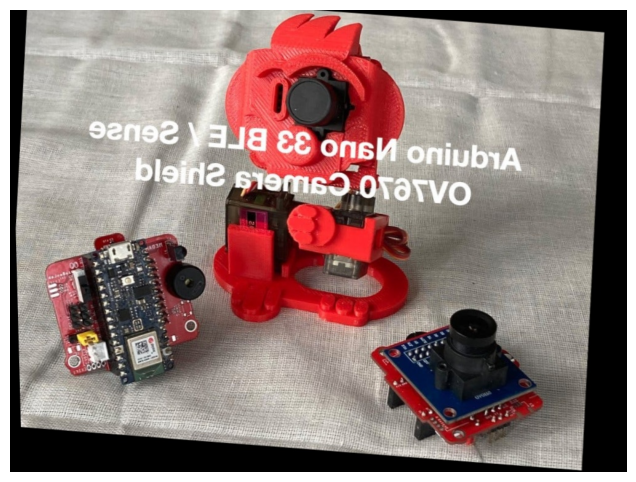

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_bounding_boxes(image_path, label_path):
    """
    Load an image, read bounding box information from a label file, and draw bounding boxes on the image.
    Display the image with bounding boxes using Matplotlib.

    Args:
        image_path (str): Path to the image file.
        label_path (str): Path to the label file containing bounding box information.
    """
    # Load the image
    image = cv2.imread(image_path)

    # Read bounding box information from the label file
    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:
            class_number = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            
            # Calculate the coordinates of the bounding box
            x1 = int((x_center - width / 2) * image.shape[1])
            y1 = int((y_center - height / 2) * image.shape[0])
            x2 = int((x_center + width / 2) * image.shape[1])
            y2 = int((y_center + height / 2) * image.shape[0])
            
            # Draw the bounding box on the image
            color = (0, 255, 0)  # Green color
            thickness = 2
            cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

    # Convert BGR image to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with bounding boxes using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

# Example usage:
if __name__ == "__main__":
    image_path = 'augmented_data/tests/augmented_0.jpg'
    label_path = 'augmented_data/tests/augmented_0.txt'

    draw_bounding_boxes(image_path, label_path)


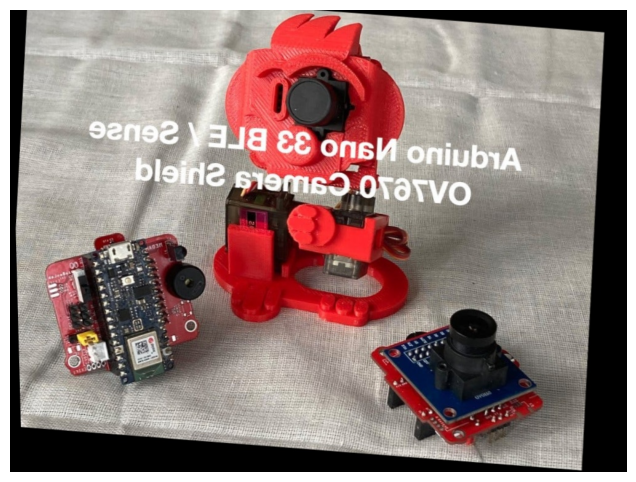

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_bounding_boxes(image_path, label_path):
    """
    Load an image, read bounding box information from a label file, and draw bounding boxes on the image.
    Display the image with bounding boxes using Matplotlib.

    Args:
        image_path (str): Path to the image file.
        label_path (str): Path to the label file containing bounding box information.
    """
    # Load the image
    image = cv2.imread(image_path)

    # Read bounding box information from the label file
    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:
            class_number = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            
            # Calculate the coordinates of the bounding box
            x1 = int((x_center - width / 2) * image.shape[1])
            y1 = int((y_center - height / 2) * image.shape[0])
            x2 = int((x_center + width / 2) * image.shape[1])
            y2 = int((y_center + height / 2) * image.shape[0])

            print(x1,x2,y1,y2)
            # Draw the bounding box on the image
            color = (0, 255, 0)  # Green color
            thickness = 2
            cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

    # Convert BGR image to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with bounding boxes using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

# Example usage:
if __name__ == "__main__":
    image_path = 'augmented_data/tests/augmented_0.jpg'
    label_path = 'augmented_data/tests/augmented_0.txt'

    draw_bounding_boxes(image_path, label_path)


In [19]:
import os
import cv2
import numpy as np

def flip_image(image, labels, flip_horizontal=True):
    if flip_horizontal:
        image = cv2.flip(image, 1)  # Flip horizontally
        for label in labels:
            label[1] = 1 - label[1]  # Update x_center for horizontal flip

    return image, labels

def scale_image(image, labels, scale_factor):
    height, width, _ = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    image = cv2.resize(image, (new_width, new_height))
    for label in labels:
        label[1] *= scale_factor  # Update x_center
        label[2] *= scale_factor  # Update y_center
        label[3] *= scale_factor  # Update width
        label[4] *= scale_factor  # Update height

    return image, labels

# Create output folders for images and labels
os.makedirs('augmented_data/tests/f/output_images', exist_ok=True)
os.makedirs('augmented_data/tests/f/output_labels', exist_ok=True)

# Load your image and labels here
image = cv2.imread('data/images/ble1.jpg')

# Load your labels from a label file
labels = []
with open('data/labels/ble1.txt', 'r') as label_file:
    for line in label_file:
        label = list(map(float, line.strip().split()))
        labels.append(label)

# Example: Flip horizontally
image, labels = flip_image(image, labels, flip_horizontal=True)

# Example: Scale the image
image, labels = scale_image(image, labels, scale_factor=0.8)

# Define output file paths
output_image_path = os.path.join('augmented_data/tests/f', 'augmented_image.jpg')
output_label_path = os.path.join('augmented_data/tests/f', 'augmented_labels.txt')

# Save the modified image
cv2.imwrite(output_image_path, image)

# Save the updated labels to a new label file in the output_labels folder
with open(output_label_path, 'w') as label_file:
    for label in labels:
        label_str = ' '.join(map(str, label))
        label_file.write(label_str + '\n')


In [ ]:
#corrrect but long points after decimal

In [20]:
import os
import cv2
import numpy as np
import math

def flip_image(image, labels, flip_horizontal=True):
    if flip_horizontal:
        image = cv2.flip(image, 1)  # Flip horizontally
        for label in labels:
            label[1] = 1 - label[1]  # Update x_center for horizontal flip

    return image, labels

def scale_image(image, labels, scale_factor):
    height, width, _ = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    image = cv2.resize(image, (new_width, new_height))
    for label in labels:
        label[1] *= scale_factor  # Update x_center
        label[2] *= scale_factor  # Update y_center
        label[3] *= scale_factor  # Update width
        label[4] *= scale_factor  # Update height

    return image, labels

def rotate_image(image, labels, angle_degrees):
    height, width, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle_degrees, 1)
    image = cv2.warpAffine(image, rotation_matrix, (width, height))

    angle_radians = math.radians(angle_degrees)
    for label in labels:
        x_center, y_center, w, h = label[1], label[2], label[3], label[4]
        new_x_center = (x_center - 0.5) * math.cos(angle_radians) - (y_center - 0.5) * math.sin(angle_radians) + 0.5
        new_y_center = (x_center - 0.5) * math.sin(angle_radians) + (y_center - 0.5) * math.cos(angle_radians) + 0.5
        label[1] = new_x_center  # Update x_center
        label[2] = new_y_center  # Update y_center

    return image, labels

# Create output folders for images and labels
output_folder = 'augmented_data/tests/f'
os.makedirs(os.path.join(output_folder, 'output_images'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'output_labels'), exist_ok=True)

# Load your image and labels here
image = cv2.imread('data/images/ble1.jpg')

# Load your labels from a label file
labels = []
with open('data/labels/ble1.txt', 'r') as label_file:
    for line in label_file:
        label = list(map(float, line.strip().split()))
        labels.append(label)

# Perform horizontal flip
flip_image, flip_labels = flip_image(image.copy(), labels.copy(), flip_horizontal=True)
output_image_path = os.path.join(output_folder, 'output_images', 'augmented_image_flip.jpg')
output_label_path = os.path.join(output_folder, 'output_labels', 'augmented_labels_flip.txt')

# Save the modified image
cv2.imwrite(output_image_path, flip_image)

# Save the updated labels to a new label file
with open(output_label_path, 'w') as label_file:
    for label in flip_labels:
        label_str = ' '.join(map(str, label))
        label_file.write(label_str + '\n')

# Perform scaling
scale_image, scale_labels = scale_image(image.copy(), labels.copy(), scale_factor=0.8)
output_image_path = os.path.join(output_folder, 'output_images', 'augmented_image_scale.jpg')
output_label_path = os.path.join(output_folder, 'output_labels', 'augmented_labels_scale.txt')

# Save the modified image
cv2.imwrite(output_image_path, scale_image)

# Save the updated labels to a new label file
with open(output_label_path, 'w') as label_file:
    for label in scale_labels:
        label_str = ' '.join(map(str, label))
        label_file.write(label_str + '\n')

# Perform rotation
rotate_image, rotate_labels = rotate_image(image.copy(), labels.copy(), angle_degrees=30)
output_image_path = os.path.join(output_folder, 'output_images', 'augmented_image_rotate.jpg')
output_label_path = os.path.join(output_folder, 'output_labels', 'augmented_labels_rotate.txt')

# Save the modified image
cv2.imwrite(output_image_path, rotate_image)

# Save the updated labels to a new label file
with open(output_label_path, 'w') as label_file:
    for label in rotate_labels:
        label_str = ' '.join(map(str, label))
        label_file.write(label_str + '\n')


In [ ]:
#wronng points

In [22]:
import os
import cv2
import numpy as np
import math

def flip_image(image, labels, flip_horizontal=True):
    if flip_horizontal:
        image = cv2.flip(image, 1)  # Flip horizontally
        for label in labels:
            label[1] = 1 - label[1]  # Update x_center for horizontal flip

    return image, labels

def scale_image(image, labels, scale_factor):
    height, width, _ = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    image = cv2.resize(image, (new_width, new_height))
    for label in labels:
        label[1] *= scale_factor  # Update x_center
        label[2] *= scale_factor  # Update y_center
        label[3] *= scale_factor  # Update width
        label[4] *= scale_factor  # Update height

    return image, labels

def rotate_image(image, labels, angle_degrees):
    height, width, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle_degrees, 1)
    image = cv2.warpAffine(image, rotation_matrix, (width, height))

    angle_radians = math.radians(angle_degrees)
    for label in labels:
        x_center, y_center = label[1], label[2]
        new_x_center = (x_center - 0.5) * math.cos(angle_radians) - (y_center - 0.5) * math.sin(angle_radians) + 0.5
        new_y_center = (x_center - 0.5) * math.sin(angle_radians) + (y_center - 0.5) * math.cos(angle_radians) + 0.5
        label[1] = round(new_x_center, 6)  # Update x_center
        label[2] = round(new_y_center, 6)  # Update y_center

    return image, labels

# Create output folders for images and labels
output_folder = 'augmented_data/tests/f'
os.makedirs(os.path.join(output_folder, 'output_images'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'output_labels'), exist_ok=True)

# Load your image and labels here
image = cv2.imread('data/images/ble1.jpg')

# Load your labels from a label file
labels = []
with open('data/labels/ble1.txt', 'r') as label_file:
    for line in label_file:
        label = list(map(float, line.strip().split()))
        labels.append(label)

# Perform horizontal flip
flip_image, flip_labels = flip_image(image.copy(), labels.copy(), flip_horizontal=True)
output_image_path = os.path.join(output_folder, 'output_images', 'augmented_image_flip.jpg')
output_label_path = os.path.join(output_folder, 'output_labels', 'augmented_labels_flip.txt')

# Save the modified image
cv2.imwrite(output_image_path, flip_image)

# Save the updated labels to a new label file
with open(output_label_path, 'w') as label_file:
    for label in flip_labels:
        # Convert the class name to an integer
        class_name = int(label[0])
        label_str = f"{class_name} {' '.join(map(lambda x: format(x, '.6f'), label[1:]))}"
        label_file.write(label_str + '\n')

# Perform scaling
scale_image, scale_labels = scale_image(image.copy(), labels.copy(), scale_factor=0.8)
output_image_path = os.path.join(output_folder, 'output_images', 'augmented_image_scale.jpg')
output_label_path = os.path.join(output_folder, 'output_labels', 'augmented_labels_scale.txt')

# Save the modified image
cv2.imwrite(output_image_path, scale_image)

# Save the updated labels to a new label file
with open(output_label_path, 'w') as label_file:
    for label in scale_labels:
        # Convert the class name to an integer
        class_name = int(label[0])
        label_str = f"{class_name} {' '.join(map(lambda x: format(x, '.6f'), label[1:]))}"
        label_file.write(label_str + '\n')

# Perform rotation
rotate_image, rotate_labels = rotate_image(image.copy(), labels.copy(), angle_degrees=30)
output_image_path = os.path.join(output_folder, 'output_images', 'augmented_image_rotate.jpg')
output_label_path = os.path.join(output_folder, 'output_labels', 'augmented_labels_rotate.txt')

# Save the modified image
cv2.imwrite(output_image_path, rotate_image)

# Save the updated labels to a new label file
with open(output_label_path, 'w') as label_file:
    for label in rotate_labels:
        # Convert the class name to an integer
        class_name = int(label[0])
        label_str = f"{class_name} {' '.join(map(lambda x: format(x, '.6f'), label[1:]))}"
        label_file.write(label_str + '\n')


In [40]:
import os
import cv2
import numpy as np
import math

def flip_image(image, labels, flip_horizontal=True):
    if flip_horizontal:
        image = cv2.flip(image, 1)  # Flip horizontally
        for label in labels:
            label[1] = 1 - label[1]  # Update x_center for horizontal flip

    return image, labels

def scale_image(image, labels, scale_factor):
    height, width, _ = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    image = cv2.resize(image, (new_width, new_height))
    for label in labels:
        label[1] *= scale_factor  # Update x_center
        label[2] *= scale_factor  # Update y_center
        label[3] *= scale_factor  # Update width
        label[4] *= scale_factor  # Update height

    return image, labels

def rotate_image(image, labels, angle_degrees):
    height, width, _ = image.shape
    angle_radians = math.radians(angle_degrees)

    # Calculate new image dimensions to fit rotated image
    new_width = int(abs(width * math.cos(angle_radians)) + abs(height * math.sin(angle_radians)))
    new_height = int(abs(width * math.sin(angle_radians)) + abs(height * math.cos(angle_radians)))

    # Compute the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((new_width / 2, new_height / 2), angle_degrees, 1)

    # Apply rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))

    # Initialize the rotated labels
    rotated_labels = []

    for label in labels:
        x_center, y_center, w, h = label[1], label[2], label[3], label[4]

        # Calculate new x and y coordinates
        new_x_center = x_center * math.cos(angle_radians) - y_center * math.sin(angle_radians)
        new_y_center = x_center * math.sin(angle_radians) + y_center * math.cos(angle_radians)

        # Calculate new width and height
        new_w = w * math.cos(angle_radians) + h * math.sin(angle_radians)
        new_h = -w * math.sin(angle_radians) + h * math.cos(angle_radians)

        # Ensure the bounding box dimensions are positive
        new_w, new_h = abs(new_w), abs(new_h)

        label[1] = round(new_x_center, 6)  # Update x_center
        label[2] = round(new_y_center, 6)  # Update y_center
        label[3] = round(new_w, 6)         # Update width
        label[4] = round(new_h, 6)         # Update height

    return rotated_image, labels

# Create output folders for images and labels
output_folder = 'augmented_data/tests/f'
os.makedirs(os.path.join(output_folder, 'output_images'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'output_labels'), exist_ok=True)

# Load your image and labels here
image = cv2.imread('data/images/ble1.jpg')

# Load your labels from a label file
labels = []
with open('data/labels/ble1.txt', 'r') as label_file:
    for line in label_file:
        label = list(map(float, line.strip().split()))
        labels.append(label)

# Perform horizontal flip
flip_image, flip_labels = flip_image(image.copy(), labels.copy(), flip_horizontal=True)
output_image_path = os.path.join(output_folder, 'output_images', 'augmented_image_flip.jpg')
output_label_path = os.path.join(output_folder, 'output_labels', 'augmented_labels_flip.txt')

# Save the modified image
cv2.imwrite(output_image_path, flip_image)

# Save the updated labels to a new label file
with open(output_label_path, 'w') as label_file:
    for label in flip_labels:
        # Convert the class name to an integer
        class_name = int(label[0])
        label_str = f"{class_name} {' '.join(map(lambda x: format(x, '.6f'), label[1:]))}"
        label_file.write(label_str + '\n')

# Perform scaling
scale_image, scale_labels = scale_image(image.copy(), labels.copy(), scale_factor=0.8)
output_image_path = os.path.join(output_folder, 'output_images', 'augmented_image_scale.jpg')
output_label_path = os.path.join(output_folder, 'output_labels', 'augmented_labels_scale.txt')

# Save the modified image
cv2.imwrite(output_image_path, scale_image)

# Save the updated labels to a new label file
with open(output_label_path, 'w') as label_file:
    for label in scale_labels:
        # Convert the class name to an integer
        class_name = int(label[0])
        label_str = f"{class_name} {' '.join(map(lambda x: format(x, '.6f'), label[1:]))}"
        label_file.write(label_str + '\n')

# Perform rotation
rotate_image, rotate_labels = rotate_image(image.copy(), labels.copy(), angle_degrees=30)
output_image_path = os.path.join(output_folder, 'output_images', 'augmented_image_rotate.jpg')
output_label_path = os.path.join(output_folder, 'output_labels', 'augmented_labels_rotate.txt')

# Save the modified image
cv2.imwrite(output_image_path, rotate_image)

# Save the updated labels to a new label file
with open(output_label_path, 'w') as label_file:
    for label in rotate_labels:
        # Convert the class name to an integer
        class_name = int(label[0])
        label_str = f"{class_name} {' '.join(map(lambda x: format(x, '.6f'), label[1:]))}"
        label_file.write(label_str + '\n')


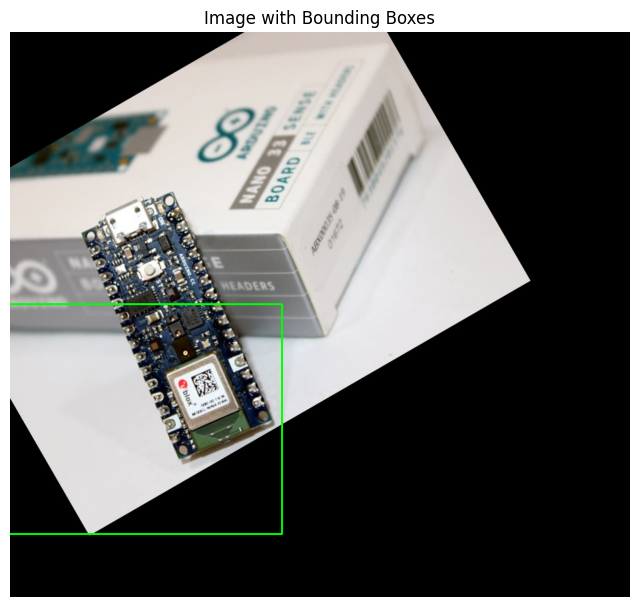

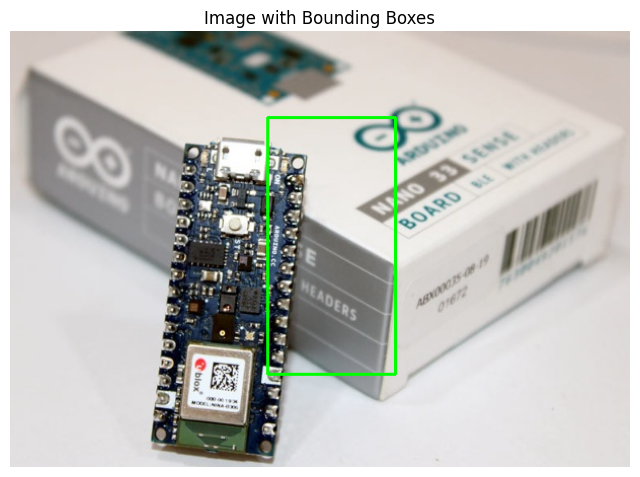

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to draw bounding boxes on the image
def draw_boxes(image, labels):
    image_with_boxes = image.copy()
    for label in labels:
        class_id = int(label[0])
        x_center, y_center, width, height = label[1], label[2], label[3], label[4]
        
        # Calculate the coordinates of the bounding box
        x1 = int((x_center - width / 2) * image.shape[1])
        y1 = int((y_center - height / 2) * image.shape[0])
        x2 = int((x_center + width / 2) * image.shape[1])
        y2 = int((y_center + height / 2) * image.shape[0])
        
        # Define the color for the bounding box (e.g., green)
        color = (0, 255, 0)
        
        # Draw the bounding box
        thickness = 2
        cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), color, thickness)
        
    return image_with_boxes

# Specify the paths to your image and label file
image_path = 'augmented_data/tests/f/output_images/augmented_image_rotate.jpg'
label_path = 'augmented_data/tests/f/output_labels/augmented_labels_rotate.txt'

# Load the image
image = cv2.imread(image_path)

# Load the labels from the label file
labels = []
with open(label_path, 'r') as label_file:
    for line in label_file:
        label = list(map(float, line.strip().split()))
        labels.append(label)

# Draw bounding boxes on the image
image_with_boxes = draw_boxes(image, labels)

# Display the image with bounding boxes using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image with Bounding Boxes')
plt.show()
# Specify the paths to your image and label file
image_path = 'augmented_data/tests/f/output_images/augmented_image_scale.jpg'
label_path = 'augmented_data/tests/f/output_labels/augmented_labels_scale.txt'

# Load the image
image = cv2.imread(image_path)

# Load the labels from the label file
labels = []
with open(label_path, 'r') as label_file:
    for line in label_file:
        label = list(map(float, line.strip().split()))
        labels.append(label)

# Draw bounding boxes on the image
image_with_boxes = draw_boxes(image, labels)

# Display the image with bounding boxes using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image with Bounding Boxes')
plt.show()

In [42]:
# Define the old and new class mappings
class_mapping = {
    15: 0,
    16: 1,
    17: 2,
    18: 3,
    19: 4,
    20: 5
}

# Function to update the class index in a label file
def update_label_file(file_path, class_mapping):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    updated_lines = []
    for line in lines:
        parts = line.strip().split(' ')
        if len(parts) >= 2:
            old_class_index = int(parts[0])
            if old_class_index in class_mapping:
                new_class_index = class_mapping[old_class_index]
                parts[0] = str(new_class_index)
                updated_lines.append(' '.join(parts))

    with open(file_path, 'w') as f:
        f.writelines('\n'.join(updated_lines))

# Specify the path to the folder containing label files
label_folder = 'data2/labels'

# Loop through label files in the folder and update them
import os
for filename in os.listdir(label_folder):
    if filename.endswith('.txt') and filename != 'classes.txt':
        label_file_path = os.path.join(label_folder, filename)
        update_label_file(label_file_path, class_mapping)

print("Label files updated successfully.")


Label files updated successfully.
